#### Problem Statement
1. Analysis on movies based on rating.

In [1]:
!pip install requests==2.31.0

In [15]:
!pip install selenium

In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np

In [17]:
#Initialise the Dataframe
df = pd.DataFrame()

In [52]:
!pip install selenium

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import numpy as np

In [171]:
def get_movie_data(df, bs_data):
    movie_data = bs_data.find_all("div", attrs={"class": "sc-74bf520e-3 avhjJ dli-parent"})
    
    for each_movie in movie_data:  # Loop through each movie in the list
        name = each_movie.find("h3", attrs={"class": "ipc-title__text"})  # Use each_movie instead of movie_data
        if name:
            # Remove any leading numbers or indices using regex
            name = re.sub(r'^\d+\.\s*', '', name.text).strip()
        else:
            name = None
        
         # Find all spans with the same class
        details = each_movie.find_all("span", attrs={"class": "sc-b189961a-8 hCbzGp dli-title-metadata-item"})
        
        # Extract details based on their positions
        year = details[0].text if len(details) > 0 else None  # Assume year is the first span
        runtime_text = details[1].text if len(details) > 1 else None  # Assume runtime is the second span
        age_restriction = details[2].text if len(details) > 2 else None  # Assume R is the third span
        
        if runtime_text:
            runtime = 0
            hours_match = re.search(r'(\d+)h', runtime_text)
            minutes_match = re.search(r'(\d+)m', runtime_text)
            
            if hours_match:
                runtime += int(hours_match.group(1)) * 60  # Convert hours to minutes
            
            if minutes_match:
                runtime += int(minutes_match.group(1))  # Add the minutes
                
        else:
            runtime = None
 
        
        ratings = each_movie.find("span", attrs={"class": "ipc-rating-star--rating"})
        if ratings:  # Check if ratings element is found
            ratings = ratings.text
        else:
            ratings = None
        

        
        no_of_views = each_movie.find("span", attrs={"class": "ipc-rating-star--voteCount"})
        if no_of_views:  # Check if no_of_views element is found
            no_of_views = no_of_views.text.replace('(', '').replace(')', '').replace('K', '')
        else:
            no_of_views = None
        
      
        #Metascore--- It is the average score of 100 which will give like overall citical reception of the movie in a TV
        metascore = each_movie.find("span", attrs={"class": "sc-b0901df4-0 bXIOoL metacritic-score-box"})
        if metascore:  # Check if metascore element is found
            metascore = metascore.text
        else:
            metascore = None
            
        describe = each_movie.find("div", attrs={"class": "ipc-html-content-inner-div"})
        
        
        data_dict = {
            "Title": name,
            "Year": year,
            "Ratings": ratings,
            "Runtime": runtime,
            "No_of_Views": no_of_views,
            "age_restriction": age_restriction,
            "Metascore": metascore,
            "Description": describe,
            #"Director": director,
            #"Stars": stars
        }
        
        each_df = pd.DataFrame(data_dict, index=[0])
        df = pd.concat((df, each_df), ignore_index=True)
    
    return df


In [76]:
# web-driver---- to upgrade the version of chromedriver.
pip install webdriver-manager

In [150]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

# Alternative initialization using Service class
from selenium.webdriver.chrome.service import Service

# Set up ChromeDriver with Service class
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)


In [172]:
# Initialize DataFrame
df = pd.DataFrame()

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--window-size=1920x1080")
print("h")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")
print('hello')
#service = Service('chromedriver.exe') 
# Update the path to your ChromeDriver
service = Service(ChromeDriverManager().install())
#driver = webdriver.Chrome(service=service)
print('hello')
driver = webdriver.Chrome(service=service, options=chrome_options)

# Loop through each page
for each_page in range(1, 1000, 100):
    page_link = f"https://www.imdb.com/search/title/?groups=top_1000&count=100&sort=user_rating,asc"
    driver.get(page_link)
    
    # Let the page load completely
    time.sleep(5)
    
#     # Parse the page source with BeautifulSoup
    bs_data = BeautifulSoup(driver.page_source, 'html.parser')
    
#     # Extract mobile info (assuming you have a function `get_mobile_info`)
    df = get_movie_data(df, bs_data)
    print(f"Processed page {each_page}")
    

# # Close the driver
driver.quit()

h
hello
hello
Processed page 1
Processed page 101
Processed page 201
Processed page 301
Processed page 401
Processed page 501
Processed page 601
Processed page 701
Processed page 801
Processed page 901


In [173]:
df

,Title,Year,Ratings,Runtime,No_of_Views,age_restriction,Metascore,Description
0,Deadpool 2,2018,7.6,119,679,R,66,Foul-mouthed mutant mercenary Wade Wilson (a.k...
1,Harry Potter and the Sorcerer's Stone,2001,7.6,152,869,PG,65,An orphaned boy enrolls in a school of wizardr...
2,Once Upon a Time... in Hollywood,2019,7.6,161,867,R,84,As Hollywood's Golden Age is winding down duri...
3,Watchmen,2009,7.6,162,588,R,56,"In a version of 1985 where superheroes exist, ..."
4,300,2006,7.6,117,873,R,52,"In the ancient battle of Thermopylae, King Leo..."
...,...,...,...,...,...,...,...,...
995,Argo,2012,7.7,120,643,R,86,Acting under the cover of a Hollywood producer...
996,Sense and Sensibility,1995,7.7,136,128,PG,84,"Rich Mr. Dashwood dies, leaving his second wif..."
997,"O Brother, Where Art Thou?",2000,7.7,107,334,PG-13,69,"In the deep south during the 1930s, three esca..."
998,Birdman or (The Unexpected Virtue of Ignorance),2014,7.7,119,672,R,87,A washed-up superhero actor attempts to revive...


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            1000 non-null   object
 1   Year             1000 non-null   object
 2   Ratings          1000 non-null   object
 3   Runtime          1000 non-null   int64 
 4   No_of_Views      1000 non-null   object
 5   age_restriction  990 non-null    object
 6   Metascore        980 non-null    object
 7   Description      1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [176]:
df.isnull().sum()

Title               0
Year                0
Ratings             0
Runtime             0
No_of_Views         0
age_restriction    10
Metascore          20
Description         0
dtype: int64

In [177]:
df.to_csv("IMDb.csv", index = False)

#### Step-2(Data Preparation)

In [4]:
dataset = pd.read_csv("IMDb.csv")

In [5]:
dataset

,Title,Year,Ratings,Runtime,No_of_Views,age_restriction,Metascore,Description
0,Deadpool 2,2018,7.6,119,679,R,66.0,Foul-mouthed mutant mercenary Wade Wilson (a.k...
1,Harry Potter and the Sorcerer's Stone,2001,7.6,152,869,PG,65.0,An orphaned boy enrolls in a school of wizardr...
2,Once Upon a Time... in Hollywood,2019,7.6,161,867,R,84.0,As Hollywood's Golden Age is winding down duri...
3,Watchmen,2009,7.6,162,588,R,56.0,"In a version of 1985 where superheroes exist, ..."
4,300,2006,7.6,117,873,R,52.0,"In the ancient battle of Thermopylae, King Leo..."
...,...,...,...,...,...,...,...,...
995,Argo,2012,7.7,120,643,R,86.0,Acting under the cover of a Hollywood producer...
996,Sense and Sensibility,1995,7.7,136,128,PG,84.0,"Rich Mr. Dashwood dies, leaving his second wif..."
997,"O Brother, Where Art Thou?",2000,7.7,107,334,PG-13,69.0,"In the deep south during the 1930s, three esca..."
998,Birdman or (The Unexpected Virtue of Ignorance),2014,7.7,119,672,R,87.0,A washed-up superhero actor attempts to revive...


In [6]:
dataset.isnull().any()

Title              False
Year               False
Ratings            False
Runtime            False
No_of_Views        False
age_restriction     True
Metascore           True
Description        False
dtype: bool

In [7]:
dataset.isnull().sum()

Title               0
Year                0
Ratings             0
Runtime             0
No_of_Views         0
age_restriction    10
Metascore          20
Description         0
dtype: int64

In [13]:
dataset[["Metascore"]] = dataset[["Metascore"]].fillna("0")
dataset[["Metascore"]]


,Metascore
0,66.0
1,65.0
2,84.0
3,56.0
4,52.0
...,...
995,86.0
996,84.0
997,69.0
998,87.0


In [14]:
dataset.isnull().sum()

Title               0
Year                0
Ratings             0
Runtime             0
No_of_Views         0
age_restriction    10
Metascore           0
Description         0
dtype: int64

In [15]:
dataset.dtypes

Title               object
Year                 int64
Ratings            float64
Runtime              int64
No_of_Views         object
age_restriction     object
Metascore           object
Description         object
dtype: object

In [16]:
dataset['No_of_Views']= dataset['No_of_Views'].astype('float')

In [17]:
dataset.dtypes

Title               object
Year                 int64
Ratings            float64
Runtime              int64
No_of_Views        float64
age_restriction     object
Metascore           object
Description         object
dtype: object

In [18]:
dataset['Metascore']= dataset['Metascore'].astype('float')

In [19]:
dataset.dtypes

Title               object
Year                 int64
Ratings            float64
Runtime              int64
No_of_Views        float64
age_restriction     object
Metascore          float64
Description         object
dtype: object

In [20]:
dataset

,Title,Year,Ratings,Runtime,No_of_Views,age_restriction,Metascore,Description
0,Deadpool 2,2018,7.6,119,679.0,R,66.0,Foul-mouthed mutant mercenary Wade Wilson (a.k...
1,Harry Potter and the Sorcerer's Stone,2001,7.6,152,869.0,PG,65.0,An orphaned boy enrolls in a school of wizardr...
2,Once Upon a Time... in Hollywood,2019,7.6,161,867.0,R,84.0,As Hollywood's Golden Age is winding down duri...
3,Watchmen,2009,7.6,162,588.0,R,56.0,"In a version of 1985 where superheroes exist, ..."
4,300,2006,7.6,117,873.0,R,52.0,"In the ancient battle of Thermopylae, King Leo..."
...,...,...,...,...,...,...,...,...
995,Argo,2012,7.7,120,643.0,R,86.0,Acting under the cover of a Hollywood producer...
996,Sense and Sensibility,1995,7.7,136,128.0,PG,84.0,"Rich Mr. Dashwood dies, leaving his second wif..."
997,"O Brother, Where Art Thou?",2000,7.7,107,334.0,PG-13,69.0,"In the deep south during the 1930s, three esca..."
998,Birdman or (The Unexpected Virtue of Ignorance),2014,7.7,119,672.0,R,87.0,A washed-up superhero actor attempts to revive...


In [21]:
dataset.isnull().sum()

Title               0
Year                0
Ratings             0
Runtime             0
No_of_Views         0
age_restriction    10
Metascore           0
Description         0
dtype: int64

### Data Analysis

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Univariate Analysis

In [23]:
dataset

,Title,Year,Ratings,Runtime,No_of_Views,age_restriction,Metascore,Description
0,Deadpool 2,2018,7.6,119,679.0,R,66.0,Foul-mouthed mutant mercenary Wade Wilson (a.k...
1,Harry Potter and the Sorcerer's Stone,2001,7.6,152,869.0,PG,65.0,An orphaned boy enrolls in a school of wizardr...
2,Once Upon a Time... in Hollywood,2019,7.6,161,867.0,R,84.0,As Hollywood's Golden Age is winding down duri...
3,Watchmen,2009,7.6,162,588.0,R,56.0,"In a version of 1985 where superheroes exist, ..."
4,300,2006,7.6,117,873.0,R,52.0,"In the ancient battle of Thermopylae, King Leo..."
...,...,...,...,...,...,...,...,...
995,Argo,2012,7.7,120,643.0,R,86.0,Acting under the cover of a Hollywood producer...
996,Sense and Sensibility,1995,7.7,136,128.0,PG,84.0,"Rich Mr. Dashwood dies, leaving his second wif..."
997,"O Brother, Where Art Thou?",2000,7.7,107,334.0,PG-13,69.0,"In the deep south during the 1930s, three esca..."
998,Birdman or (The Unexpected Virtue of Ignorance),2014,7.7,119,672.0,R,87.0,A washed-up superhero actor attempts to revive...


In [24]:
dataset.head()

,Title,Year,Ratings,Runtime,No_of_Views,age_restriction,Metascore,Description
0,Deadpool 2,2018,7.6,119,679.0,R,66.0,Foul-mouthed mutant mercenary Wade Wilson (a.k...
1,Harry Potter and the Sorcerer's Stone,2001,7.6,152,869.0,PG,65.0,An orphaned boy enrolls in a school of wizardr...
2,Once Upon a Time... in Hollywood,2019,7.6,161,867.0,R,84.0,As Hollywood's Golden Age is winding down duri...
3,Watchmen,2009,7.6,162,588.0,R,56.0,"In a version of 1985 where superheroes exist, ..."
4,300,2006,7.6,117,873.0,R,52.0,"In the ancient battle of Thermopylae, King Leo..."


In [25]:
print(dataset.describe())

              Year      Ratings      Runtime  No_of_Views    Metascore
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean   2003.890000     7.649000   119.480000   348.860000    71.900000
std      14.060427     0.050015    22.019865   228.551255    16.645332
min    1955.000000     7.600000    80.000000    38.000000     0.000000
25%    1998.000000     7.600000   102.000000   154.500000    66.000000
50%    2006.500000     7.600000   116.500000   290.000000    74.000000
75%    2014.000000     7.700000   131.000000   498.500000    82.250000
max    2024.000000     7.700000   188.000000   910.000000    95.000000


In [26]:
dataset.isnull().sum()

Title               0
Year                0
Ratings             0
Runtime             0
No_of_Views         0
age_restriction    10
Metascore           0
Description         0
dtype: int64

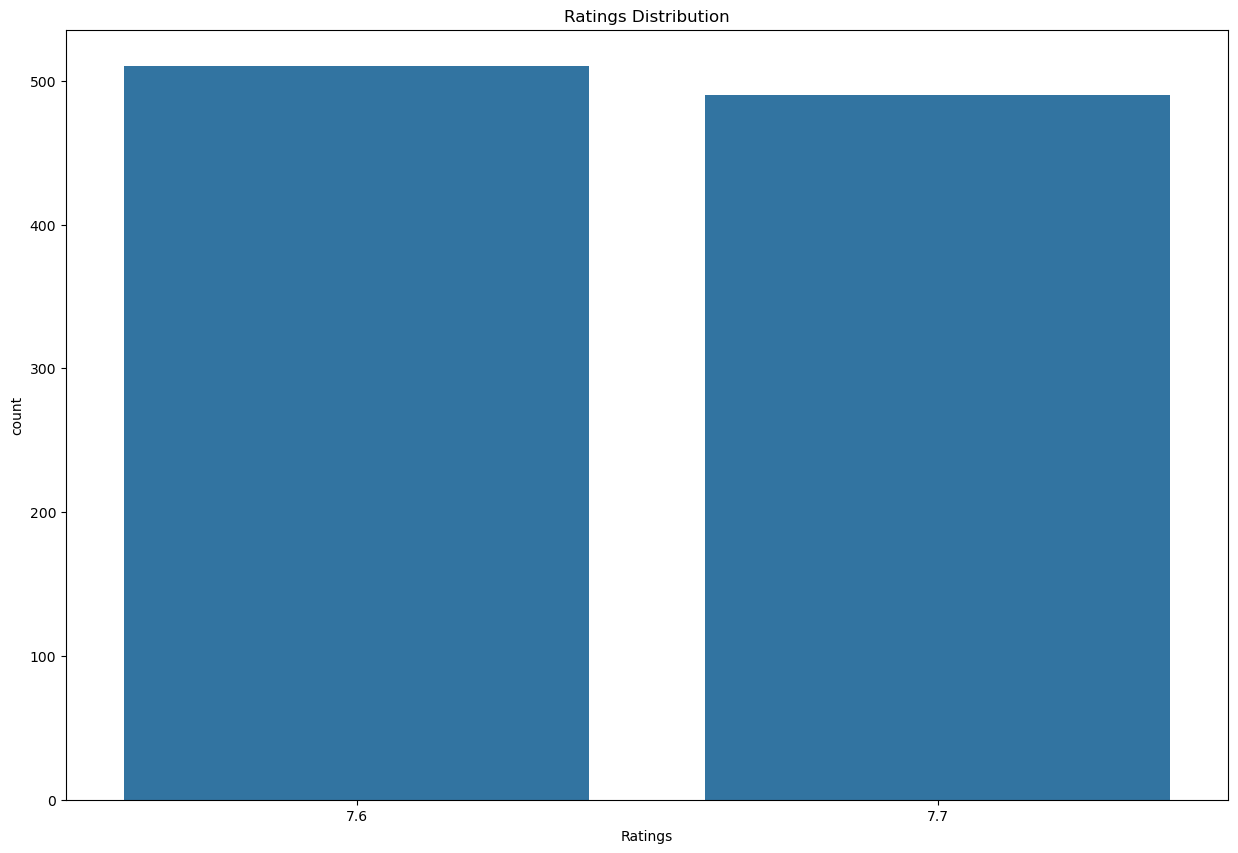

In [29]:
#Rating Distribution
plt.figure(figsize =(15,10))
chart = sns.countplot(x = dataset["Ratings"], orient ="h")
plt.xlabel("Ratings")
plt.title("Ratings Distribution")
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

#Observation:

If we observe that all the ratings of the movies is either 7.6 or 7.7 and some more movies have 7.6 ratings comparing to 7.7 rating.

In [30]:
dataset["Ratings"].describe()

count    1000.000000
mean        7.649000
std         0.050015
min         7.600000
25%         7.600000
50%         7.600000
75%         7.700000
max         7.700000
Name: Ratings, dtype: float64

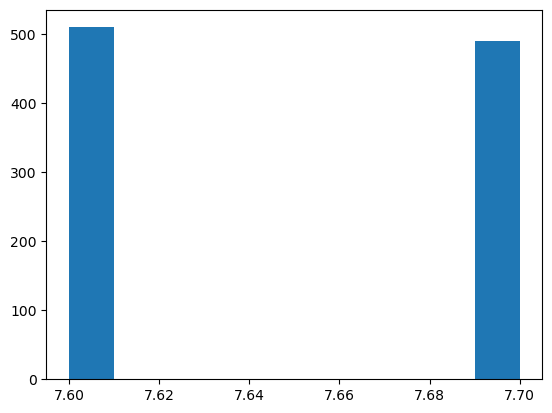

In [31]:
plt.hist(dataset["Ratings"])
plt.show()

<Axes: xlabel='Ratings', ylabel='Density'>

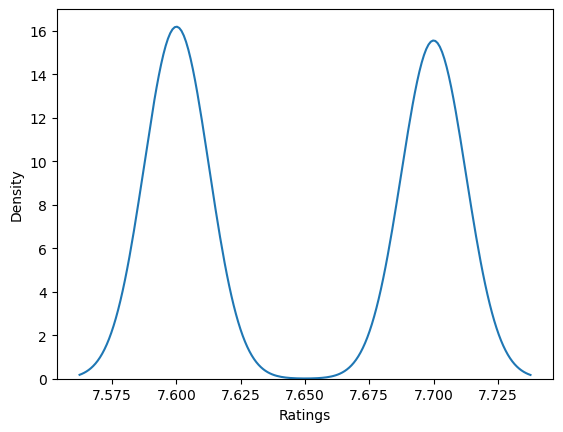

In [32]:
sns.kdeplot(dataset["Ratings"])

In [33]:
dataset[dataset["Ratings"] > 7.6]

,Title,Year,Ratings,Runtime,No_of_Views,age_restriction,Metascore,Description
51,Inside Out 2,2024,7.7,96,118.0,PG,73.0,A sequel that features Riley entering puberty ...
52,Kingsman: The Secret Service,2014,7.7,129,729.0,R,60.0,A spy organisation recruits a promising street...
53,Mission: Impossible - Dead Reckoning Part One,2023,7.7,163,262.0,PG-13,81.0,Ethan Hunt and his IMF team must track down a ...
54,X-Men: First Class,2011,7.7,131,734.0,PG-13,65.0,"In the 1960s, superpowered humans Charles Xavi..."
55,John Wick: Chapter 4,2023,7.7,169,349.0,R,78.0,John Wick uncovers a path to defeating The Hig...
...,...,...,...,...,...,...,...,...
995,Argo,2012,7.7,120,643.0,R,86.0,Acting under the cover of a Hollywood producer...
996,Sense and Sensibility,1995,7.7,136,128.0,PG,84.0,"Rich Mr. Dashwood dies, leaving his second wif..."
997,"O Brother, Where Art Thou?",2000,7.7,107,334.0,PG-13,69.0,"In the deep south during the 1930s, three esca..."
998,Birdman or (The Unexpected Virtue of Ignorance),2014,7.7,119,672.0,R,87.0,A washed-up superhero actor attempts to revive...


In [34]:
dataset[dataset["Ratings"] < 7.7]

,Title,Year,Ratings,Runtime,No_of_Views,age_restriction,Metascore,Description
0,Deadpool 2,2018,7.6,119,679.0,R,66.0,Foul-mouthed mutant mercenary Wade Wilson (a.k...
1,Harry Potter and the Sorcerer's Stone,2001,7.6,152,869.0,PG,65.0,An orphaned boy enrolls in a school of wizardr...
2,Once Upon a Time... in Hollywood,2019,7.6,161,867.0,R,84.0,As Hollywood's Golden Age is winding down duri...
3,Watchmen,2009,7.6,162,588.0,R,56.0,"In a version of 1985 where superheroes exist, ..."
4,300,2006,7.6,117,873.0,R,52.0,"In the ancient battle of Thermopylae, King Leo..."
...,...,...,...,...,...,...,...,...
946,Barton Fink,1991,7.6,116,130.0,R,69.0,A renowned New York playwright is enticed to C...
947,21 Grams,2003,7.6,124,247.0,R,70.0,A freak accident brings together a critically ...
948,Control,2007,7.6,122,69.0,R,78.0,"A profile of Ian Curtis, the enigmatic singer ..."
949,The Little Prince,2015,7.6,108,67.0,PG,70.0,A little girl lives in a very grown-up world w...


In [35]:
dataset["Ratings"].skew()

0.0400681296554547

#### Bivariant Analysis

In [30]:
gp_year = dataset.groupby("Year")
print(gp_brand)

In [31]:
gp_year["Ratings"].mean().sort_values(ascending = False).head(15)

Year
2024    7.700000
1986    7.700000
2000    7.700000
1996    7.700000
2017    7.700000
1988    7.700000
1990    7.700000
1980    7.700000
1978    7.700000
1972    7.700000
2023    7.700000
1966    7.700000
2014    7.683333
2010    7.666667
2005    7.666667
Name: Ratings, dtype: float64

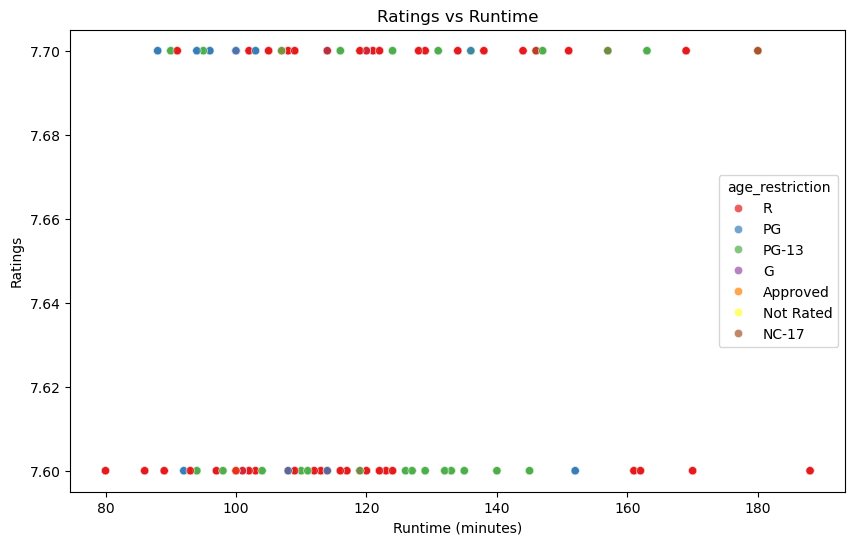

In [36]:
# Relationship Between Ratings and Runtime
plt.figure(figsize=(10,6))
sns.scatterplot(data = dataset, x= 'Runtime', y = 'Ratings',hue = 'age_restriction', palette='Set1', alpha=0.7)
plt.title('Ratings vs Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Ratings')
plt.show()

#Observation:

If we observe that plot most runtime and ratings are rated by R(restricted-Under 17), and remaining rated by PG-13(under 13) and PG(Parental Guidance).

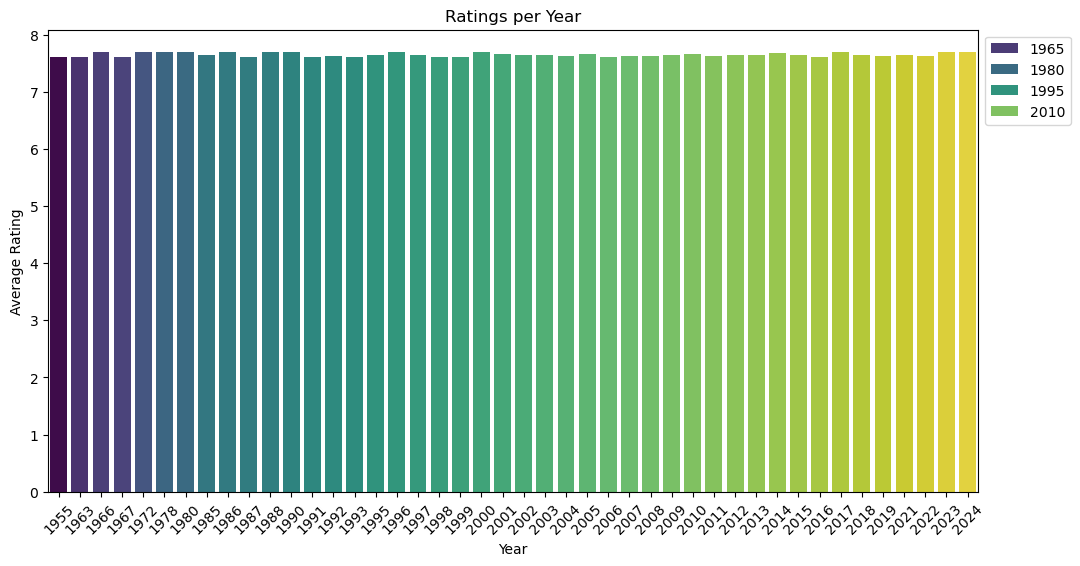

In [37]:
#Average Ratings per Year
average_ratings_per_year = dataset.groupby('Year')['Ratings'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=average_ratings_per_year, x='Year', y='Ratings',hue  = 'Year', palette='viridis',)
plt.title('Ratings per Year')
plt.xlabel('Year')
plt.legend(loc = 'upper left', bbox_to_anchor= (1,1))
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

#Observation:

1. If we see that the rating in every year its carrying constant around 7.6 to 7.7.


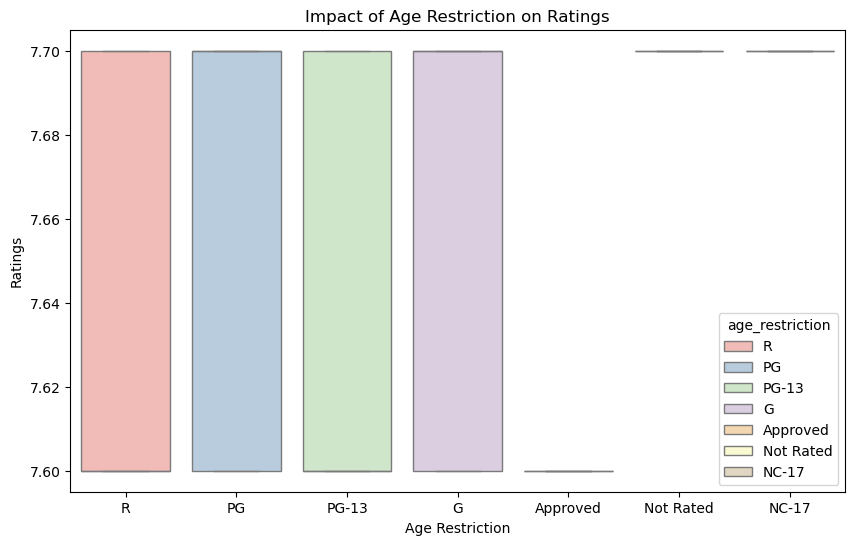

In [38]:
#Analysing Age Restriction Impact on Ratings
plt.figure(figsize=(10,6))
sns.boxplot(data = dataset, x='age_restriction', y='Ratings',hue = 'age_restriction', palette= 'Pastel1')
plt.title('Impact of Age Restriction on Ratings')
plt.xlabel('Age Restriction')
plt.ylabel('Ratings')
plt.show()

#Observations

If we observe the above plot between Ratings vs age_restriction we can observe that outliers are in Approved, Not Rated, NC-17 category.

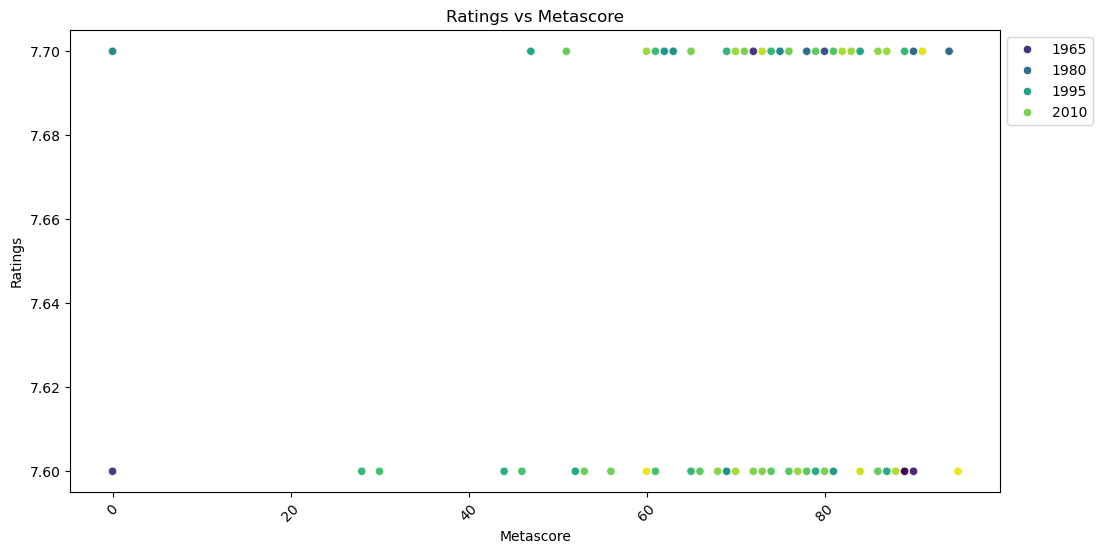

In [43]:
# Metascore vs Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataset, x='Metascore', y='Ratings',hue  = 'Year', palette='viridis',)
plt.title('Ratings vs Metascore')
plt.xlabel('Metascore')
plt.legend(loc = 'upper left', bbox_to_anchor= (1,1))
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Observation:

1. If we observe that the Metascores are more different in 2010 the ratings are the same as 7.6 and 7.7.

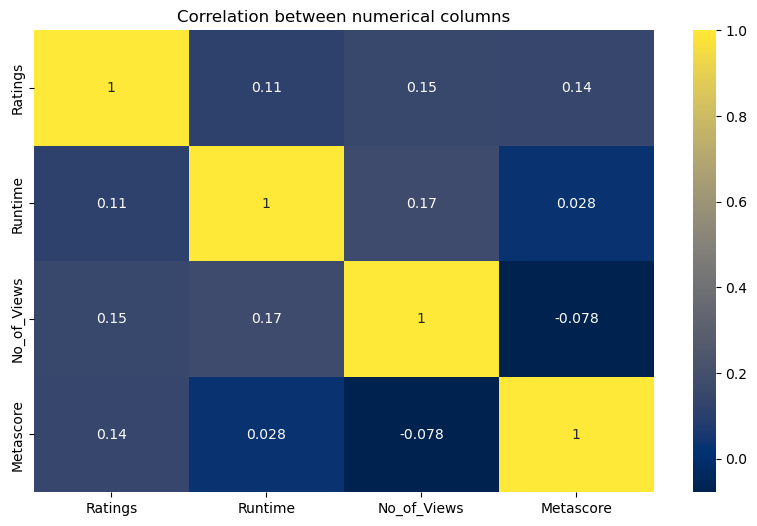

In [39]:
#Corelation matrix
plt.figure(figsize = (10,6))
corr_matrix = dataset[['Ratings', 'Runtime', 'No_of_Views', 'Metascore']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='cividis')
plt.title("Correlation between numerical columns")
plt.show()

#Observation:

If we observe above correlation of numerical columns wrt to Ratings, their is weak positive correlation and their is negative correlation between Runtime and Metascore , No_of views and Metascore.

In [ ]:
#Conclusion

From this I conclude that my Project Data Collection, Data Cleaning, and EDA on IMDb Website Data via Web Scraping:

1. Analysis on ratings gave insights regarding no_of_views, age_restriction, Runtime and Metascore to make decisions for future projects.
2. ratings vs No_of_views                                                                                                                        